# Homework Lecture5

LDA and Logistic Classification and Feature Development for MNIST Image sample

## Preliminaries

### Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, KFold

import sys
sys.path.append("../..")
from E4525_ML import mnist
from E4525_ML.multiclass_logistic import LogisticGDClassifier
%matplotlib inline

### Random Seed

In [2]:
seed=458
np.random.seed(seed)

### Data Directories

In [3]:
data_dir=r"../../raw/mnist/"

## Read Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Read MNIST data set and labels,  also read the MNMIST test data set and test labels

In [4]:
    images_filename=data_dir+"train-images-idx3-ubyte.gz"
    labels_filename=data_dir+"train-labels-idx1-ubyte.gz"

    test_images_filename=data_dir+"t10k-images-idx3-ubyte.gz"
    test_labels_filename=data_dir+"t10k-labels-idx1-ubyte.gz"

    images=mnist.read_images(images_filename)
    labels=mnist.read_labels(labels_filename)
    
    test_images=mnist.read_images(test_images_filename)
    test_labels=mnist.read_labels(test_labels_filename)
    
    print(images.shape,labels.shape)

(60000, 28, 28) (60000,)


<div class="alert alert-block alert-info"> Problem 1.2 </div>
Use `skelearn`'s `train_test_split` function to separate the MNIST samples into  a 15% validation set and a  training sample.


In [5]:
images_train,images_val,labels_train,labels_val=train_test_split(images,labels,test_size=0.15)
images_train.shape,images_val.shape

((51000, 28, 28), (9000, 28, 28))

## LDA

<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit an LDA model on the training data set

In [6]:
model=LinearDiscriminantAnalysis()
model.fit(images_train.reshape(len(images_train),-1),labels_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Compute model accuracy on the training set

In [7]:
Y_pred=model.predict(images_train.reshape(len(images_train),-1))
"Training accuracy",np.mean(Y_pred==labels_train)

('Training accuracy', 0.87211764705882355)

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Compute accuracy of the model on the validation set

In [8]:
Y_pred=model.predict(images_val.reshape(len(images_val),-1))
"Validation accuracy",np.mean(Y_pred==labels_val)

('Validation accuracy', 0.86477777777777776)

## Logistic Regression

<div class="alert alert-block alert-info"> Problem 3.1 </div>

Use the `LogisticGDClassifier` class from `E4525_ML.multiclass_logistic` module to fit a logistic model

In [9]:
model=LogisticGDClassifier()
model.fit(images_train.reshape(len(images_train),-1),labels_train,
          # for display only
         images_val.reshape(len(images_val),-1),labels_val)

	 0 Loss = 2371.93402487 Train_Accuracy 0.07 Evaluation Loss = 2361.71508727 Accuracy = 0.074
	 10 Loss = 241.973233903 Train_Accuracy 0.923 Evaluation Loss = 286.917511869 Accuracy = 0.917
	 20 Loss = 246.977401865 Train_Accuracy 0.927 Evaluation Loss = 270.820700789 Accuracy = 0.929
	 30 Loss = 211.514657894 Train_Accuracy 0.936 Evaluation Loss = 280.82263712 Accuracy = 0.921
	 40 Loss = 297.338538704 Train_Accuracy 0.922 Evaluation Loss = 291.958969499 Accuracy = 0.927
	 50 Loss = 215.526658685 Train_Accuracy 0.933 Evaluation Loss = 322.493619841 Accuracy = 0.919
	 60 Loss = 230.03199764 Train_Accuracy 0.93 Evaluation Loss = 241.338675769 Accuracy = 0.936
	 70 Loss = 224.457288023 Train_Accuracy 0.935 Evaluation Loss = 319.988976253 Accuracy = 0.913
	 80 Loss = 216.871540811 Train_Accuracy 0.939 Evaluation Loss = 249.979327898 Accuracy = 0.931
	 90 Loss = 251.477731453 Train_Accuracy 0.93 Evaluation Loss = 322.836290933 Accuracy = 0.904
	 99 Loss = 248.914335198 Train_Accuracy 0.93 

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Compute model accuracy in the training data set

In [10]:
Y_pred=model.predict(images_train.reshape(len(images_train),-1))
np.mean(Y_pred==labels_train)

0.93462745098039213

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Compute model accuracy in the valuation data set

In [11]:
Y_pred=model.predict(images_val.reshape(len(images_val),-1))
np.mean(Y_pred==labels_val)

0.92100000000000004

## Feature Engineering in one Dimension

In [12]:
N=50
N_val=1000

In [13]:
def f(x):
    return 10*(1-4*(np.abs(np.abs(x)-1)))

In [14]:
def generate_sample(N):
    X=np.random.uniform(-2,2,N)
    eta=f(X)
    eta.shape
    theta=1/(1+np.exp(-eta))
    Y= np.random.uniform(0,1,N)>theta
    return X,Y

<div class="alert alert-block alert-info"> Problem 4.0 </div>
Generate a training sample of variables $X$ and $Y$ with $N$ data points, and separate valuation and test samples
with $N_val$ datap points.

In [15]:
X_train,Y_train=generate_sample(N)
X_val,Y_val=generate_sample(N_val)
X_test,Y_test=generate_sample(N_val)

<div class="alert alert-block alert-info"> Problem 4.1 </div>
What is the proportion of positive class ($Y=1$) samples on the training data?

In [16]:
np.mean(Y_train)

0.71999999999999997

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Write a function able to generate the feature matrix
$$
    H_{i,d}= h_d(x_i)
$$
for $i=1,\dots N$ and $d=1,\dots D$

where the functions $h_d(x)$ are defined as 
$$
    h_d(x) = x^d
$$

In [17]:
def polynomial_features(X,D):
    features=[]
    for d in range(1,D+1):
        hd=X**d
        features.append(hd)
    return np.vstack(features).T

<div class="alert alert-block alert-info"> Problem 4.3 </div>
We will train  logistic regression models (use sklearn `LogisticRegression` class) over the training data you already generated. 


Use the valuation set you already generated to select the best value of $D$, also plot accuracy on the  training and valuation sets as a function of $D$.

[HINT]
1. You only need to consider the range $D=1,\dots D=10$.
2. Remember to disable regularization by setting the parameter $C$ of the `LogisticRegression` class to a very large number.



In [18]:
train_accuracies=[]
val_accuracies=[]

Ds=range(1,11)
for D in Ds:
    H_train=polynomial_features(X_train,D)
    model=LogisticRegression(C=1e40)
    model.fit(H_train,Y_train)
    Y_pred=model.predict(H_train)
    train_accuracy=np.mean(Y_pred==Y_train)
    train_accuracies.append(train_accuracy)
    H_val=polynomial_features(X_val,D)
    Y_pred=model.predict(H_val)
    val_accuracy=np.mean(Y_pred==Y_val) 
    val_accuracies.append(val_accuracy)
    print(D,train_accuracy,val_accuracy)
val_accuracies=np.array(val_accuracies)
best_idx=val_accuracies.argmax()
best_D=Ds[best_idx]
print("Best",best_D,val_accuracies[best_idx])  

1 0.72 0.731
2 0.72 0.731
3 0.86 0.792
4 0.96 0.891
5 0.96 0.923
6 0.96 0.915
7 0.96 0.9
8 0.96 0.909
9 0.96 0.882
10 0.96 0.898
Best 5 0.923


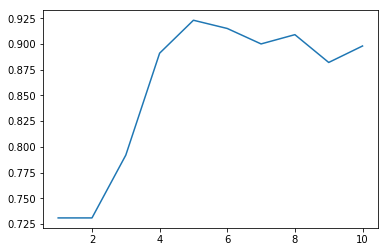

In [19]:
plt.plot(Ds,val_accuracies)

<div class="alert alert-block alert-info"> Problem 4.4 </div>
Use the test set you already generated to measure the accuracy for the optimal classifier you have found
(do not use data from the  valuation set to train the classifier)

In [20]:
H_train=polynomial_features(X_train,best_D)
model=LogisticRegression(C=1e40)
model.fit(H_train,Y_train)
H_test=polynomial_features(X_test,best_D)
Y_pred=model.predict(H_test)
test_accuracy=np.mean(Y_pred==Y_test) 
print("Test Accuracy",test_accuracy)

Test Accuracy 0.933


## Feature Engineering for MNIST sample

<div class="alert alert-block alert-info"> Problem 5.1 </div>
In this problem we will use `mnist.ImageFeatureModel` class to find the optimal number of orientations $\theta$  of the oriented gradients
features for the MNIST data set.

1. use `mnist.ImageFeatureModel` to generate image oriented gradient features.
2. use  `LogisticGDClassifier` as the base model
3. set the block size to 4 
4. select the best number of orientations by performing  5-Fold cross validation on the full MNIST data set.
5. Consider only [1,2,4,8] as possible values for the orientation
6. Plot number of orientations vs validation accuracy

[HINT] to `valiation_model` function below will be useful to perform cross-validation

In [21]:
def validate_model(model,K,X,Y):
    folder=KFold(K,shuffle=True)
    folds=folder.split(X,Y)
    val_error=0.0
    fold_count=0
    for fold in folds:
        train_idx,val_idx=fold
        x_train=X[train_idx]
        y_train=Y[train_idx]
        x_val=X[val_idx]
        y_val=Y[val_idx]     
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        val_err=np.mean(y_val==y_pred)
        #print(y_pred)
        val_error+=val_err
        fold_count+=1
        print(fold_count,val_err)
    return val_error/K
      

In [22]:
# we will go all the way to 32 orientations
# for this problem you only needed to go up to 8
base_model=LogisticGDClassifier()
K=5
block_size=4
orientations=[1,2,4,8,16,32]

val_accuracy=[]
for orientation in orientations:
    model=mnist.ImageFeatureModel(base_model,size=block_size,orientations=orientation)
    accuracy=validate_model(model,K,images,labels)
    val_accuracy.append(accuracy)
    print("orientation=",orientation,accuracy)

	 0 Loss = 2284.24766048 Train_Accuracy 0.125 
	 10 Loss = 557.426414386 Train_Accuracy 0.836 
	 20 Loss = 511.526745603 Train_Accuracy 0.849 
	 30 Loss = 506.540144123 Train_Accuracy 0.861 
	 40 Loss = 503.296292931 Train_Accuracy 0.834 
	 50 Loss = 425.369758057 Train_Accuracy 0.873 
	 60 Loss = 482.066491927 Train_Accuracy 0.857 
	 70 Loss = 447.989698541 Train_Accuracy 0.839 
	 80 Loss = 476.333354796 Train_Accuracy 0.856 
	 90 Loss = 401.105346972 Train_Accuracy 0.876 
	 99 Loss = 405.630319225 Train_Accuracy 0.878 
1 0.863833333333
	 0 Loss = 2290.99398618 Train_Accuracy 0.127 
	 10 Loss = 561.798978673 Train_Accuracy 0.841 
	 20 Loss = 530.653306568 Train_Accuracy 0.835 
	 30 Loss = 530.260717508 Train_Accuracy 0.837 
	 40 Loss = 494.074594696 Train_Accuracy 0.849 
	 50 Loss = 467.495589829 Train_Accuracy 0.843 
	 60 Loss = 417.525813517 Train_Accuracy 0.888 
	 70 Loss = 467.905168692 Train_Accuracy 0.85 
	 80 Loss = 448.10910172 Train_Accuracy 0.867 
	 86 Loss = 463.164703614 T

	 50 Loss = 83.4589377219 Train_Accuracy 0.973 
	 60 Loss = 90.3600821877 Train_Accuracy 0.975 
	 70 Loss = 99.6097972007 Train_Accuracy 0.974 
	 80 Loss = 87.3776622749 Train_Accuracy 0.971 
	 90 Loss = 104.251189792 Train_Accuracy 0.972 
	 99 Loss = 87.4454357134 Train_Accuracy 0.973 
1 0.972583333333
	 0 Loss = 2316.89158987 Train_Accuracy 0.07 
	 10 Loss = 163.514623952 Train_Accuracy 0.959 
	 20 Loss = 159.678992165 Train_Accuracy 0.958 
	 30 Loss = 118.469763337 Train_Accuracy 0.976 
	 40 Loss = 111.915227624 Train_Accuracy 0.967 
	 50 Loss = 117.246383176 Train_Accuracy 0.966 
	 60 Loss = 102.895999709 Train_Accuracy 0.975 
	 70 Loss = 88.2990850082 Train_Accuracy 0.981 
	 80 Loss = 105.704107167 Train_Accuracy 0.971 
	 90 Loss = 107.855943739 Train_Accuracy 0.975 
	 99 Loss = 83.1591467615 Train_Accuracy 0.981 
2 0.972416666667
	 0 Loss = 2288.196081 Train_Accuracy 0.164 
	 10 Loss = 185.91246824 Train_Accuracy 0.945 
	 20 Loss = 147.341722379 Train_Accuracy 0.966 
	 30 Loss = 

In [23]:
val_accuracy=np.array(val_accuracy)
best_idx=val_accuracy.argmax()
best_orientations=orientations[best_idx]
print("best number of orientations",best_orientations,val_accuracy[best_idx])

best number of orientations 32 0.975783333333


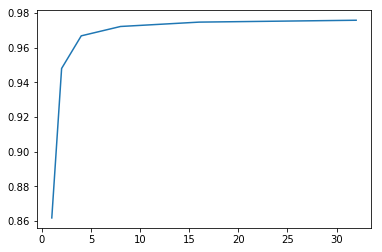

In [24]:
plt.plot(orientations,val_accuracy)

<div class="alert alert-block alert-info"> Problem 5.2 </div>

Fit the model with the optimal number of orientations to the full MNIST data set and estimate its accuracy on the MNIST test set


In [25]:
model=mnist.ImageFeatureModel(base_model,size=block_size,orientations=best_orientations)
model.fit(images,labels)
Y_pred=model.predict(test_images)
print("Test Accuracy = ", np.mean(Y_pred==test_labels))

	 0 Loss = 2311.97266492 Train_Accuracy 0.051 
	 10 Loss = 109.761835374 Train_Accuracy 0.971 
	 20 Loss = 94.7885214674 Train_Accuracy 0.972 
	 30 Loss = 72.1905535949 Train_Accuracy 0.976 
	 40 Loss = 85.3511515461 Train_Accuracy 0.978 
	 50 Loss = 73.6007107665 Train_Accuracy 0.978 
	 60 Loss = 69.4628982731 Train_Accuracy 0.983 
	 70 Loss = 57.7171451484 Train_Accuracy 0.986 
	 80 Loss = 57.5551867118 Train_Accuracy 0.983 
	 90 Loss = 64.7193259523 Train_Accuracy 0.978 
	 99 Loss = 47.4168959232 Train_Accuracy 0.987 
Test Accuracy =  0.9816
